In [195]:
import tensorflow_core as tf
import matplotlib.pyplot as plt 
import numpy as np

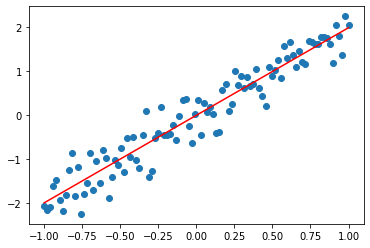

In [198]:
learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.35

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


def model(X, w):
    return tf.multiply(X, w)


w = tf.Variable(0.0, name="weights")
y_model = model(X, w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
sess.close()

plt.scatter(x_train, y_train)
y_learned = x_train * w_val

plt.plot(x_train, y_learned, "r")
plt.show()
